Read Stream Data from S3 in JSON format
https://towardsdatascience.com/how-to-read-data-files-on-s3-from-amazon-sagemaker-f288850bfe8f

In [2]:
import boto3
import json
import pandas as pd
from sagemaker import get_execution_role

bucket = 'raz-eu-central-1-tutorial'
prefix = 'kinesis-analytics/'


role = get_execution_role()


In [27]:
%%time
#list the content of the bucket / prefix
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix=prefix)['Contents']

data = pd.DataFrame()

for f in contents:
    response = conn.get_object(Bucket=bucket, Key=f['Key'])
    if response['ContentType'] == 'application/octet-stream':
        #print(f['Key'])
        body = response['Body']
        #jsonObject = body.read()
        #print(jsonObject)
        temp = pd.read_json(body,lines=True)
        data = data.append(temp)
data.head()

CPU times: user 12.9 s, sys: 69 ms, total: 13 s
Wall time: 33 s


,PRESSURE,EVENT_TIME,TEMPERATURE,HUMIDITY,ANOMALY_SCORE
0,989.938041,2020-11-22 22:00:31.760894,20.38,42.347507,1.307758
1,989.916192,2020-11-22 22:00:32.872372,20.39,42.359085,1.289527
2,989.885988,2020-11-22 22:00:33.990491,20.38,42.370639,1.196880
3,989.864618,2020-11-22 22:00:35.105371,20.38,42.370614,1.304555
4,989.942219,2020-11-22 22:00:36.217284,20.39,42.370651,1.298816


In [22]:
#show number of rows and columns
%%time
data.shape

UsageError: Line magic function `%%time` not found.


Scatter plot of temperature and Anomaly score
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

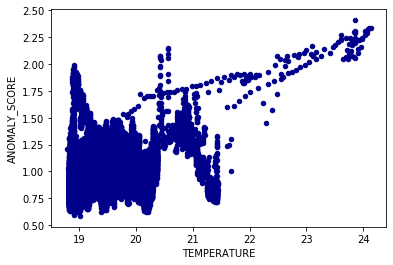

In [31]:
ax1 = data.plot.scatter(x='TEMPERATURE',
                      y='ANOMALY_SCORE',
                      c='DarkBlue')

Binarize the anomaly score column with the threshold of 2 and move the column to the front of the table to sever as label column
https://stackoverflow.com/questions/40717156/binarize-integer-in-a-pandas-dataframe

In [32]:
data['ANOMALY_SCORE'] = (data['ANOMALY_SCORE']>2.0).astype(int)
data.head()

,PRESSURE,EVENT_TIME,TEMPERATURE,HUMIDITY,ANOMALY_SCORE
0,989.938041,2020-11-22 22:00:31.760894,20.38,42.347507,0
1,989.916192,2020-11-22 22:00:32.872372,20.39,42.359085,0
2,989.885988,2020-11-22 22:00:33.990491,20.38,42.370639,0
3,989.864618,2020-11-22 22:00:35.105371,20.38,42.370614,0
4,989.942219,2020-11-22 22:00:36.217284,20.39,42.370651,0


In [33]:
#postivie labels
data[(data['ANOMALY_SCORE']==1)].count()

PRESSURE         73
EVENT_TIME       73
TEMPERATURE      73
HUMIDITY         73
ANOMALY_SCORE    73
dtype: int64

In [34]:
#negative labels
data[(data['ANOMALY_SCORE']==0)].count()

PRESSURE         30731
EVENT_TIME       30731
TEMPERATURE      30731
HUMIDITY         30731
ANOMALY_SCORE    30731
dtype: int64

Over sample postive lables with SMOTE: Synthetic minority over-sampling technique

In [41]:
from imblearn.over_sampling import SMOTE

X = data[['PRESSURE','EVENT_TIME','TEMPERATURE','HUMIDITY']]
y = data['ANOMALY_SCORE']

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_sample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

X_resampled.head()


ModuleNotFoundError: No module named 'imblearn'

In [38]:
Spilt data 80 / 20 for training and Validation

SyntaxError: invalid syntax (<ipython-input-38-0ee363ae6752>, line 1)